Problem Statement
As part of Module 11, you are required to complete the project titled “Neural Network from Scratch”. This project is designed to test your understanding of fundamental neural network concepts by implementing a basic feedforward neural network using only NumPy, no external ML libraries like TensorFlow or PyTorch.
You will work with synthetic image data representing the characters A, B, and C using binary pixel patterns. Each image is a 5×6 (30-pixel) grid encoded as a 1D array. Your goal is to classify the input image as A, B, or C using a two-layer neural network trained via backpropagation.

What You Will Do
In this project, you will define pixel-based binary patterns for the letters A, B, and C, and use them as training data for your neural network. You will implement a feedforward neural network with a hidden layer, using the sigmoid activation function. The model will be trained using custom backpropagation logic, optimizing the weights to minimize classification error. Throughout training, you’ll track loss and accuracy across epochs and visualize them using matplotlib.
Once training is complete, you’ll test the model by predicting the correct class of the input letter and displaying its image using matplotlib.pyplot.imshow(). This project helps you gain hands-on experience with matrix operations, weight initialization, activation functions, loss computation, and gradient descent updates, which are essential building blocks of neural networks.


In [3]:
# Creating data set
#three-letter classifier for the characters A, B, and C.

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

In [5]:
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

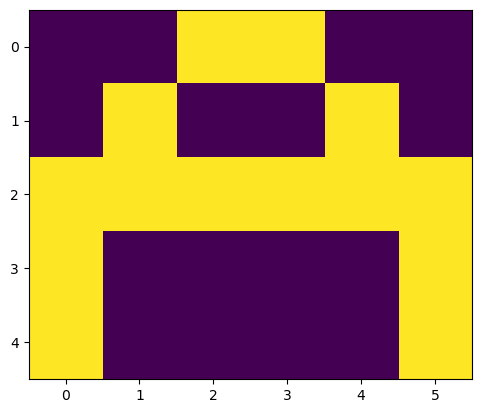

In [7]:
#Visualizing the Dataset
import numpy as np
import matplotlib.pyplot as plt

# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [9]:
#As the data set is in the form of list we will convert it into numpy array. 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
                                np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
# Defining the Architecture of the Neural Network
#Our neural network will have the following structure:
#Input Layer: 1 layer with 30 nodes (representing the 5x6 grid).
#Hidden Layer: 1 layer with 5 nodes.
#Output Layer: 1 layer with 3 nodes (representing the letters A, B, and C).

# Defining the Neural Network Functions
#Activation Function: We'll use the sigmoid activation function.
#Feedforward Process: Computes the output by passing the input through the layers.
#Backpropagation: Updates weights to minimize the loss.
#Loss Function: We’ll use Mean Squared Error (MSE) to compute the loss.

In [11]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1 
	a1 = sigmoid(z1)  # out put of layer 2 
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1) 
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

In [13]:
#We initialize the weights for both the hidden layer and the output layer randomly.
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[ 1.22041476  0.13587134  0.64960955 -0.07996944 -2.68055964]
 [ 0.35552473 -0.86979204 -0.46380025 -0.35552084  0.51861814]
 [ 0.61802482  0.08508843  0.93457947 -1.18483085  1.08165384]
 [-0.64994591  0.0253566   1.11332188  0.27550989 -0.84373916]
 [ 0.74262421  0.26890633 -1.55553331  1.40311323  0.95468459]
 [ 0.65419271 -0.32167998 -1.69354337 -0.32798166  0.0995883 ]
 [-0.13611635  0.71121763  0.45941346  0.71387478 -0.95730394]
 [-1.41898144 -1.66136469  0.87128298  0.02804057 -0.85249148]
 [-0.38072184  0.17313073  1.36694273 -0.12682963  0.7854713 ]
 [ 0.26283378 -1.62608117  1.37020905  0.48155764  0.70904667]
 [-0.66613789 -0.54669559 -0.70598221  0.55590964 -1.0905834 ]
 [-0.01285325 -1.37396825 -0.24888699  0.4091603   0.01879425]
 [-1.56934856 -0.04861275 -0.12352305  1.21940738  2.45795094]
 [-1.21855863  0.79540088 -1.29671342 -1.49164816 -0.95750852]
 [ 0.09455974  1.30224918  1.0229135   0.29177886 -0.78865909]
 [ 0.21611716  0.00995307  1.60547032 -0.60433713  0.22

In [15]:
# Training the model using train function
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 61.002828933261746
epochs: 2 ======== acc: 64.0636632489601
epochs: 3 ======== acc: 66.9262709359117
epochs: 4 ======== acc: 69.3781476408688
epochs: 5 ======== acc: 71.30187438675766
epochs: 6 ======== acc: 72.77201513101137
epochs: 7 ======== acc: 73.90490438372652
epochs: 8 ======== acc: 74.79324951490501
epochs: 9 ======== acc: 75.51045416898017
epochs: 10 ======== acc: 76.11518223546462
epochs: 11 ======== acc: 76.6517079296244
epochs: 12 ======== acc: 77.15125402109317
epochs: 13 ======== acc: 77.63445392920497
epochs: 14 ======== acc: 78.11372051200539
epochs: 15 ======== acc: 78.59496927768808
epochs: 16 ======== acc: 79.07880521852843
epochs: 17 ======== acc: 79.56165117256207
epochs: 18 ======== acc: 80.0373282108089
epochs: 19 ======== acc: 80.49919162363189
epochs: 20 ======== acc: 80.94225756241914
epochs: 21 ======== acc: 81.36443147320851
epochs: 22 ======== acc: 81.7664052938186
epochs: 23 ======== acc: 82.1506155566527
epochs: 24 ======== acc: 8

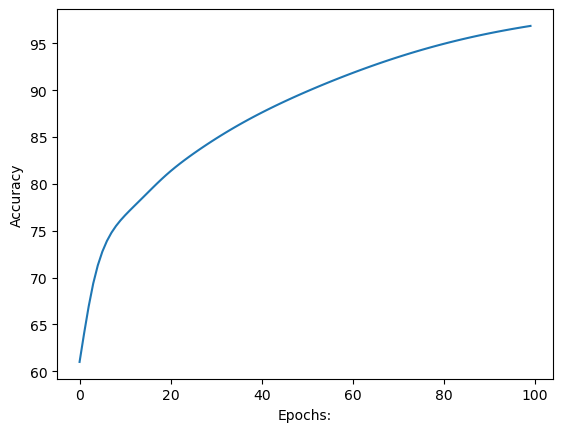

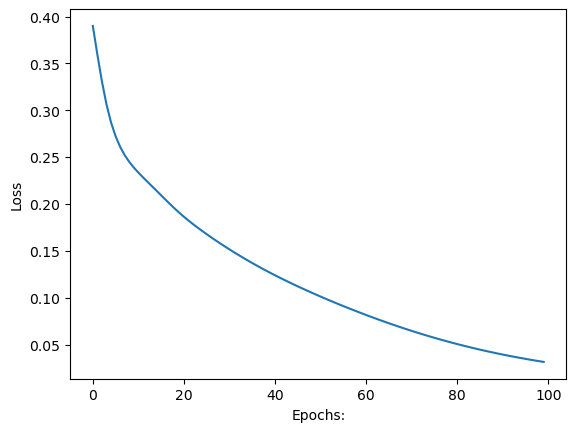

In [17]:
# Plotting accuracy and loss
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter B.


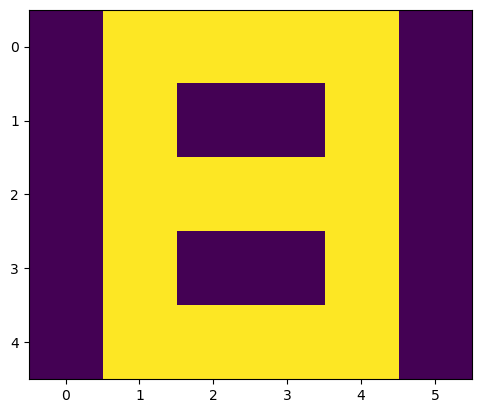

In [19]:
# Making predictions
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 
# Example: Predicting for letter 'B'	
predict(x[1], w1, w2)